In [1]:
!pip install openai
!pip install openai==0.28


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\epqps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\epqps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import openai
#api키 입력
openai.api_key = 'API_KEY' # <내 api key
#  < 대회 api key
# 사용자 정보 입력
# db에서 꺼내와야됨
user_info = {
    'age': 24,
    'languageLevel': '초급',
    'languageGoals': '조음 발달 장애 치료, 문장 구성 능력 향상',
    'interests': '만화',
    'accuracy' : '60%',
    'feedback' : '아이의 어휘 문법이 부족한거 같아요'
}

# 프롬프트 설정
# 계속 수정해야 될 것 같습니다.
prompt = f"""
  사용자 정보:
  - 연령: {user_info['age']}개월
  - 언어 발달 수준: {user_info['languageLevel']}
  - 주요 언어 목표: {user_info['languageGoals']}
  - 관심 분야: {user_info['interests']}
  - 직전 정답률: {user_info['accuracy']}
  - 부모 피드백: {user_info['feedback']}

  
  API 요청:
  1. 사용자 정보에 기반 언어 발달 장애 조기 진단을 위한 P-FA, PPVT, REEL-R 기반의 언어발달지연 진단 테스트 문항을 5문제 생성해줘

    다음은 예시의 규칙이야
      1. 문법은 꼭지켜줘!
      2. 선택지가 명확해야 돼 (질문의 오답과 정답이 명확해야 돼)
      3. 선택지는 3개로 제한해줘!
      4. 사용자의 연령에 맞게 문제를 이해하기 쉽게 만들어줘.
      5. 관심 분야 쪽으로 문제를 생성해줘!

  2. 문제 정답률을 바탕으로 부족한 부분을 분석해 주고 이에 맞는 언어 발달 수준 판단해줘

  3. 부모의 피드백을 중점적으로 맞춰서 답변해줘
  
  다음은 우수 대답 예시야. 비슷하게 생성해줘.
    1. **문제 1:** 만화에서 친구가 웃고 있어요. 친구는 무엇을 하고 있나요?
    - A) 물 마시고 있어요.
    - B) 웃고 있어요.
    - C) 자고 있어요.
    - **정답:** B) 웃고 있어요.

    2. **문제 2:** 만화 캐릭터가 사과를 들고 있습니다. 사과는 어떤 색이에요?
      - A) 파란색이에요.
      - B) 빨간색이에요.
      - C) 노란색이에요.
      - **정답:** B) 빨간색이에요.

    3. **문제 3:** 만화에서는 강아지가 뛰어다니고 있어요. 강아지가 어떤 소리를 낼까요?
      - A) 멍멍!
      - B) 야옹!
      - C) 삐약삐약!
      - **정답:** A) 멍멍!

    4. **문제 4:** 만화 속 친구들이 공원에서 놀고 있어요. 친구는 어떤 장난감을 가지고 놀까요?
      - A) 공에요.
      - B) 나무에요.
      - C) 책이에요.
      - **정답:** A) 공에요.
  ...
  2. **문장 구성 연습:** 아이가 자주 사용하는 표현을 문장으로 만들어보도록 유도하기. 예를 들어, "나는 사과를 먹어요."와 같이 간단한 문장부터 시작하기.
  3. **놀이 활동 연계:** 만화 캐릭터에 대한 역할놀이를 통해 언어 사용을 연습하도록 하여, 자연스럽게 문맥 속 어휘를 습득할 수 있도록 지원하기.
"""

prompt_tip = f""""
  사용자 정보:
  - 연령: {user_info['age']}개월
  - 언어 발달 수준: {user_info['languageLevel']}
  - 관심 분야: {user_info['interests']}
  - 직전 정답률: {user_info['accuracy']}
  - 부모 피드백: {user_info['feedback']}
  
  API 요청:
  - 아이 발전을 위해 아이 개월 수 에 맞게 지금까지의 발전도에 따른 피드백, 양육 팁을 줘
  다음은 피드백을 주기 위한 정보야
    1. 부모와 아이의 유대 관계:
      아이와 강한 유대 관계를 형성하여, 아이가 최상의 의사소통 능력을 발휘하도록 지원하는 환경을 조성
      부모의 역할: 부모는 통역자, 촉진자, 언어 모델, 대화 상대 등 다양한 역할을 수행할 수 있어야 하며, 상황에 맞게 역할을 선택하거나 조합하여 사용해야 한다.
    
    2. 언어 발달 촉진 방법: 
      OWLing:
        Observe (관찰하기): 아이의 동작, 몸짓, 얼굴 표정을 관찰하여 아이의 관심과 의도를 파악
        Wait (기다리기): 아이가 반응할 수 있도록 시간을 줌
        Listen (듣기): 아이가 하는 모든 말을 경청하고, 끼어들지 않으며, 아이의 말을 존중하는 자세를 유지
      
    3.의사소통의도와 수단 이해:

      아이가 왜 그리고 어떻게 의사소통을 시도하는지 파악하여, 아이의 발달 수준에 맞는 지원을 제공. 아이가 구어 또는 문장을 통해 다양한 의사소통 의도를 표현할 수 있도록 도움
    
    4. 부모의 상호작용 촉진 전략:

      부모는 아이와의 상호작용을 이끌어내기 위해 기다리고, 반응하고, 질문하는 등 다양한 방법을 사용하여 아이의 언어 발달을 지원,
      아이가 스스로 상호작용을 시작하도록 유도하고, 적절한 피드백을 제공하여 아이의 발음을 교정하거나 문장을 확장해줌.
"""
# OpenAI API 호출
# system 에게 역할 부여
# persona information 주기 (15년 경력의 아동 언어 발달 치료사)
response = openai.ChatCompletion.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a friendly and helpful Child Language Development Disorder Therapist with 15 years of experience."},
        {"role": "user", "content": prompt}
    ]
)
response_tip = openai.ChatCompletion.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a friendly and helpful Child Language Development Disorder Therapist with 15 years of experience."},
        {"role": "user", "content": prompt_tip}
    ]
)

In [5]:
# 아이 발전을 위한 지금까지의 발전도와 그에 따른 피드백, 양육 팁 생성 프롬프트
print(response_tip.choices[0].message.content)

안녕하세요! 아이의 언어 발달을 돕기 위한 피드백과 양육 팁을 제공해드리겠습니다. 24개월 된 아이의 언어 발달에 대한 이해와 동시에 아이와 함께 즐겁게 의사소통할 수 있는 방법을 소개하겠습니다.

### 현재 언어 발달 수준
24개월 아이의 경우, 일반적으로 약 50~100 단어의 어휘를 가지고 있으며, 짧은 문장을 형성하기 시작합니다. 하지만 아이마다 발달 속도가 다를 수 있으며, 특히 아이의 흥미 분야인 만화를 이용해 언어 능력을 더욱 촉진시킬 수 있습니다.

### 발전을 위한 피드백
1. **부모와 아이의 유대 관계 구축**:
   - **강한 유대 관계**: 부모님이 아이와 많은 시간을 보내며, 일상적인 대화와 놀이를 통해 강한 유대감을 형성하세요. 아이가 안전함을 느끼면 더욱 적극적으로 의사소통할 수 있습니다.
   - **역할 수행**: 부모님이 언어 모델이 되어주세요. 아이가 부모님의 말을 듣고 따라 할 수 있도록 다양한 역할을 자연스럽게 수행하며, 적절한 언어 자극을 제공하세요.

2. **OWLing 방법 사용**:
   - **관찰하기**: 아이의 표정, 몸짓, 관심을 주의 깊게 관찰하세요. 예를 들어, 만화를 보는 동안 어떤 장면에 집중하는지, 어떤 캐릭터를 좋아하는지 파악하세요.
   - **기다리기**: 아이가 반응할 시간을 주세요. 만화를 보며 아이가 문장이 아닌 단어라도, 몸짓으로라도 표현할 때까지 기다려 주세요.
   - **듣기**: 아이가 하는 말을 끼어들지 않고 경청해주세요. "그래, 그 캐릭터가 재미있니?" 와 같이 아이의 의견을 존중하는 반응을 보여주세요.

3. **의사소통의도와 수단 이해**:
   - **의사소통 목적 파악**: 아이가 왜 특정 단어를 사용하려 하는지, 어떤 목적으로 의사소통을 시도하는지 이해하세요. 예를 들어, 밥을 달라고 할 때 '밥'이라는 단어보다는 "밥 주세요"와 같은 짧은 문장을 사용하게 유도하세요.
   - **지원 제공**: 아이의 현재 언어 수준에 맞춘 지원을 제공하세요. 반복적인 질

In [6]:
# 응답 출력
print(response.choices[0].message.content)


### 1. 언어발달지연 진단 테스트 문항

**문제 1:** 만화에서 고양이가 쥐를 쫓고 있어요. 고양이는 무엇을 하고 있나요?
- A) 쥐를 쫓고 있어요.
- B) 수영하고 있어요.
- C) 잠자고 있어요.
- **정답:** A) 쥐를 쫓고 있어요.

**문제 2:** 만화 캐릭터가 바나나를 들고 있습니다. 바나나는 어떤 색이에요?
- A) 초록색이에요.
- B) 파란색이에요.
- C) 노란색이에요.
- **정답:** C) 노란색이에요.

**문제 3:** 만화에서는 새가 나무 위에서 노래하고 있어요. 새는 어떤 소리를 낼까요?
- A) 삐약삐약!
- B) 멍멍!
- C) 야옹!
- **정답:** A) 삐약삐약!

**문제 4:** 만화 속 친구가 자전거를 타고 있습니다. 친구는 무엇을 타고 있나요?
- A) 기차 타고 있어요.
- B) 자전거 타고 있어요.
- C) 배 타고 있어요.
- **정답:** B) 자전거 타고 있어요.

**문제 5:** 만화 속에서 강아지가 뼈다귀를 물고 있어요. 강아지는 무엇을 물고 있나요?
- A) 볼펜.
- B) 책.
- C) 뼈다귀.
- **정답:** C) 뼈다귀.

### 2. 문제 정답률 분석 및 언어발달 수준 평가

24개월 아이가 이 테스트에서 60%의 정답률을 기록했으므로, 약간의 언어발달 지연 신호가 보일 수 있습니다. 하지만 이는 아이의 개별적 특성이나 환경에 따른 차이일 수 있습니다. 

아이의 주요한 어려움:
1. 어휘 및 문법 부족
2. 문장 구성 능력 부족
3. 조음 발달 장애

현재 아이의 언어 수준:
초급 언어 발달 수준으로 판단되며, 특히 문장 구성 및 정확한 발음에서 어려움을 겪고 있는 것으로 보입니다.

### 3. 부모 피드백을 반영한 언어 발달 촉진 전략

**문장 구성 연습:**
아이에게 자주 사용되는 단어와 공통적인 문장을 연습시켜봅시다. 예를 들어, "나 엄마 좋아해요." 또는 "나는 사과를 먹어요."와 같은 간단한 문장을 함께 말해보세요.

**어휘 확장 활동:**
매일 새로운 단어

In [18]:
!pip install json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\epqps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
print(response)
print(response.choices[0].message.content)

{
  "id": "chatcmpl-9r7oaxb6HnWm2CGPwpqzV8hEmvlsV",
  "object": "chat.completion",
  "created": 1722448452,
  "model": "gpt-4o-2024-05-13",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "### 1. \uc5b8\uc5b4\ubc1c\ub2ec\uc9c0\uc5f0 \uc9c4\ub2e8 \ud14c\uc2a4\ud2b8 \ubb38\ud56d\n\n**\ubb38\uc81c 1:** \ub9cc\ud654\uc5d0\uc11c \uace0\uc591\uc774\uac00 \uc950\ub97c \ucad3\uace0 \uc788\uc5b4\uc694. \uace0\uc591\uc774\ub294 \ubb34\uc5c7\uc744 \ud558\uace0 \uc788\ub098\uc694?\n- A) \uc950\ub97c \ucad3\uace0 \uc788\uc5b4\uc694.\n- B) \uc218\uc601\ud558\uace0 \uc788\uc5b4\uc694.\n- C) \uc7a0\uc790\uace0 \uc788\uc5b4\uc694.\n- **\uc815\ub2f5:** A) \uc950\ub97c \ucad3\uace0 \uc788\uc5b4\uc694.\n\n**\ubb38\uc81c 2:** \ub9cc\ud654 \uce90\ub9ad\ud130\uac00 \ubc14\ub098\ub098\ub97c \ub4e4\uace0 \uc788\uc2b5\ub2c8\ub2e4. \ubc14\ub098\ub098\ub294 \uc5b4\ub5a4 \uc0c9\uc774\uc5d0\uc694?\n- A) \ucd08\ub85d\uc0c9\uc774\uc5d0\uc694.\n- B) \ud30c\ub78

In [10]:
import json

# 문제와 정답을 추출하여 저장할 리스트
qa_list = []

# 문항들을 개별적으로 분리
questions = response.strip().split("\n\n")

for question in questions:
    lines = question.split("\n")
    if len(lines) < 3:
        continue  # 빈 줄이나 불완전한 문항 건너뛰기

    try:
        # 문제 부분 추출
        question_text = lines[1].split(":** ")[1]  
        # 정답 부분 추출
        answer_line = next(line for line in lines if "**정답:**" in line)
        answer_text = answer_line.split("**정답:** ")[1]

        qa_list.append({
            "문제": question_text.strip(),
            "정답": answer_text.strip()
        })
    except (IndexError, StopIteration):
        continue  # 잘못된 형식의 문항 건너뛰기

qa_list

print(qa_list)

AttributeError: strip

In [ ]:
!pip install pillow

Combined image saved as combined_comic.png


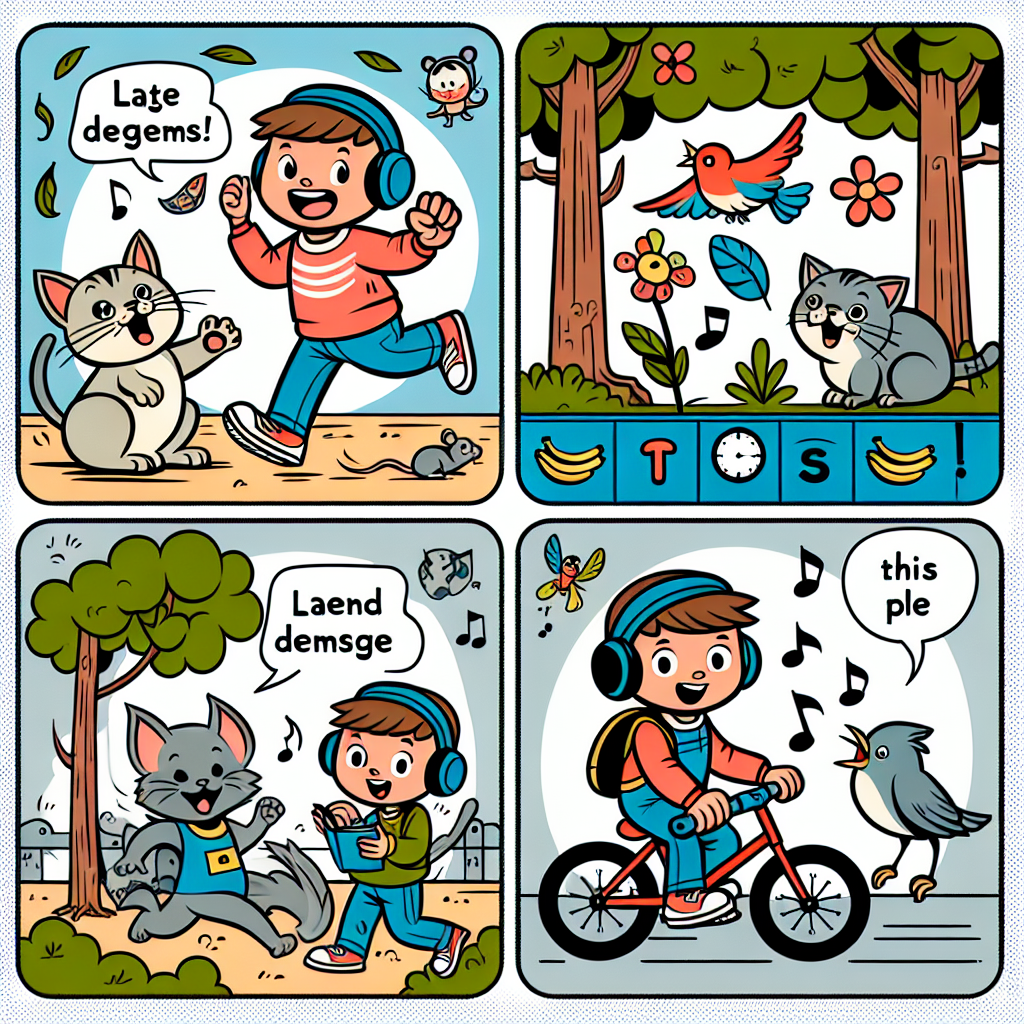

In [12]:
import openai
from PIL import Image
import requests
from io import BytesIO

# 프롬프트

prompt_webtoon = response.choices[0].message.content + "문제 부분만 각각 사진 받아서 1>2>3>4 순으로 네분할 이미지 생성"
# 이미지 생성 및 다운로드(DALL-E사용)
response_webtoon = openai.Image.create(
    prompt= prompt_webtoon, #길이 제한 있어서 1000까지 슬라이싱 해줬습니다.
    model="dall-e-3",
    n=1,
    size="1024x1024"
)
image_url = response_webtoon['data'][0]['url']
image_response = requests.get(image_url)
img = Image.open(BytesIO(image_response.content))

# 결과물 저장
img.save('combined_comic.png')
print("Combined image saved as combined_comic.png")
img



In [65]:
!pip install dalle

ERROR: Could not find a version that satisfies the requirement dalle (from versions: none)
ERROR: No matching distribution found for dalle

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\epqps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [66]:
from openai import dalle

# 이미지 생성 요청
response = dalle.text2im({
    "prompt": "A cartoon character is drinking milk. The character is holding a glass of milk to their mouth, drinking with a content expression. They are standing in a simple indoor setting with minimal background details to focus on the action. The character has a friendly appearance, with expressive eyes and a smile. The scene should clearly convey the act of drinking milk.",
    "size": "1024x1024"
})

# 생성된 이미지의 ID와 URL 출력
image_id = response['data'][0]['id']
image_url = response['data'][0]['url']

print(f"Generated Image ID: {image_id}")
print(f"Image URL: {image_url}")


ImportError: cannot import name 'dalle' from 'openai' (C:\Users\epqps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openai\__init__.py)

In [ ]:
from flask import Flask, render_template, request, redirect, url_for

app = Flask(__name__)

# 샘플 문제 데이터
questions = [
    {
        'question': "다음 중 토끼 그림은 어디에 있나요?",
        'options': [
            {'text': "사자 그림", 'image_url': "https://example.com/lion.jpg"},
            {'text': "토끼 그림", 'image_url': "https://example.com/rabbit.jpg"},
            {'text': "고양이 그림", 'image_url': "https://example.com/cat.jpg"}
        ],
        'correct_option': 1
    },
    {
        'question': "암호맨이 하늘로 날아가요. 어디로 가고 있나요?",
        'options': [
            {'text': "땅", 'image_url': None},
            {'text': "바다", 'image_url': None},
            {'text': "하늘", 'image_url': None}
        ],
        'correct_option': 2
    }
    # 추가적인 문제들을 여기에 추가할 수 있습니다.
]

@app.route('/')
def index():
    return render_template('index.html', questions=questions)

@app.route('/submit', methods=['POST'])
def submit():
    score = 0
    for i, question in enumerate(questions):
        selected_option = int(request.form.get(f'question-{i}', -1))
        if selected_option == question['correct_option']:
            score += 1
    return render_template('result.html', score=score, total=len(questions))

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
<!doctype html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Language Development Test</title>
</head>
<body>
  <form action="{{ url_for('submit') }}" method="POST">
    {% for i, question in enumerate(questions) %}
      <div>
        <p>{{ question['question'] }}</p>
        {% for j, option in enumerate(question['options']) %}
          <input type="radio" id="question-{{i}}-option-{{j}}" name="question-{{i}}" value="{{j}}">
          <label for="question-{{i}}-option-{{j}}">
            {% if option['image_url'] %}
              <img src="{{ option['image_url'] }}" alt="{{ option['text'] }}" width="100"><br>
            {% endif %}
            {{ option['text'] }}
          </label>
          <br>
        {% endfor %}
      </div>
    {% endfor %}
    <button type="submit">Submit</button>
  </form>
</body>
</html>
